<a href="https://colab.research.google.com/github/Amisha1019/assignment/blob/main/assi15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
covid_df = pd.read_csv("covid19_Confirmed_dataset.csv")

In [19]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [20]:
covid_df = covid_df.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [21]:
covid_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [22]:
covid_df = covid_df.groupby('Country/Region').sum()

In [23]:
covid_df['Total Confirmed'] = covid_df.iloc[:, -1]

In [24]:
covid_df = covid_df[['Total Confirmed']].reset_index()

In [25]:
covid_df.head()

,Country/Region,Total Confirmed
0,Afghanistan,2171
1,Albania,773
2,Algeria,4006
3,Andorra,745
4,Angola,27


In [26]:
happiness_df = pd.read_csv("worldwide_happiness_report.csv")

In [27]:
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [28]:
happiness_df = happiness_df.rename(columns={
    'Country or region': 'Country/Region',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP',
    'Social support': 'Support',
    'Healthy life expectancy': 'Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Corruption'})

In [30]:
df = pd.merge(happiness_df, covid_df, on='Country/Region', how='inner')

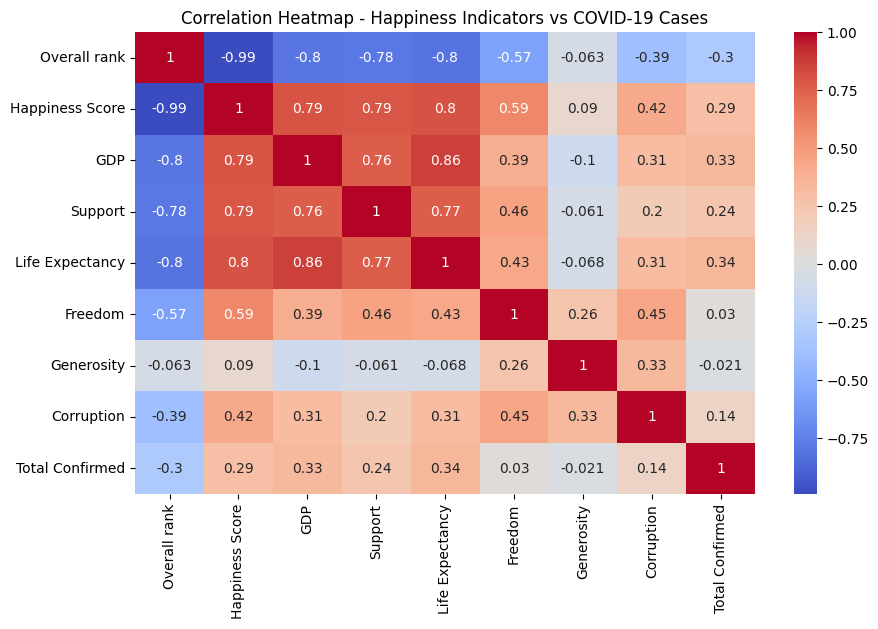

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Happiness Indicators vs COVID-19 Cases")
plt.show()


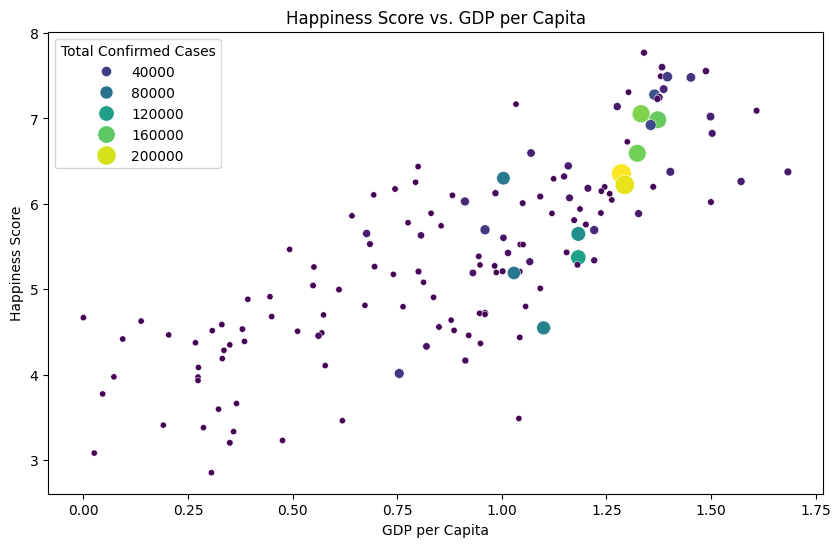

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP', y='Happiness Score', hue='Total Confirmed', size='Total Confirmed', sizes=(20, 200), palette='viridis')
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Total Confirmed Cases')
plt.show()

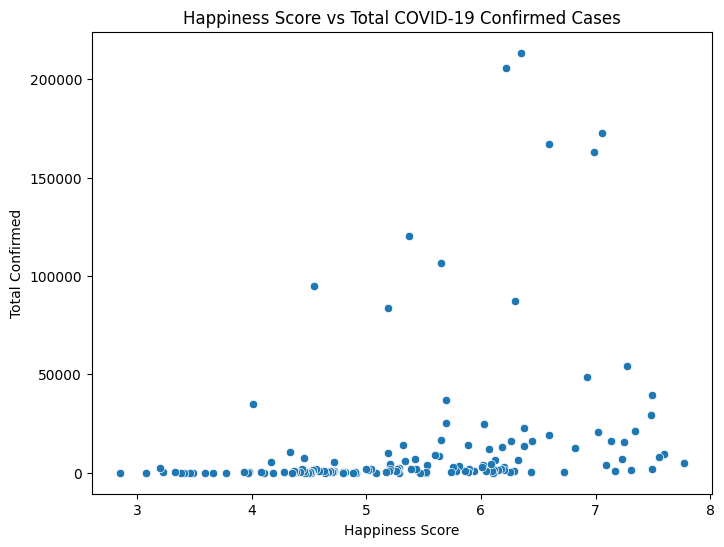

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data= df, x='Happiness Score', y='Total Confirmed')
plt.title("Happiness Score vs Total COVID-19 Confirmed Cases")
plt.show()

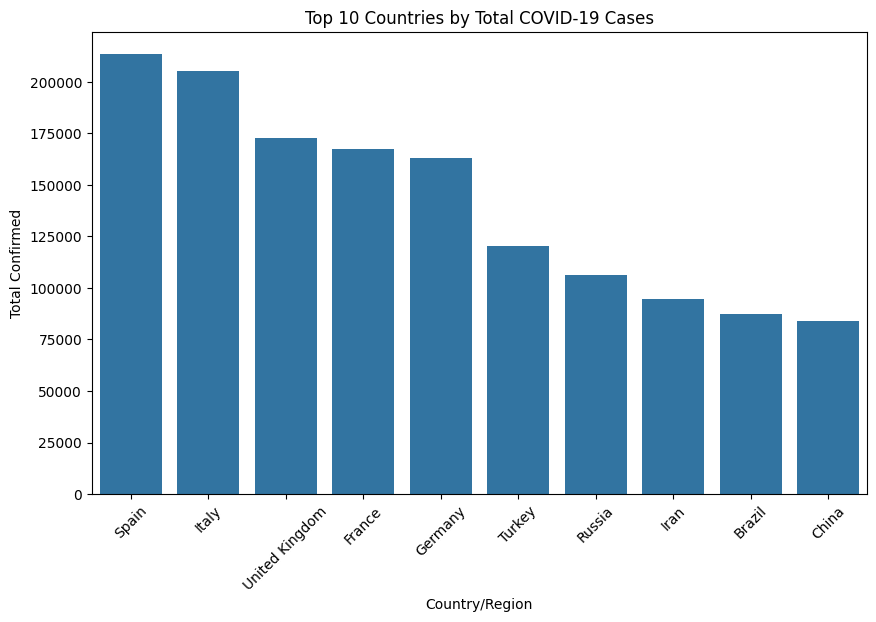

In [36]:
top_covid = df.sort_values('Total Confirmed', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_covid, x='Country/Region', y='Total Confirmed')
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.show()


In [37]:
df.to_csv("merged_covid_happiness.csv", index=False)

In [38]:
df.head()

,Overall rank,Country/Region,Happiness Score,GDP,Support,Life Expectancy,Freedom,Generosity,Corruption,Total Confirmed
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4995
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,9356
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7738
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1797
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,39512


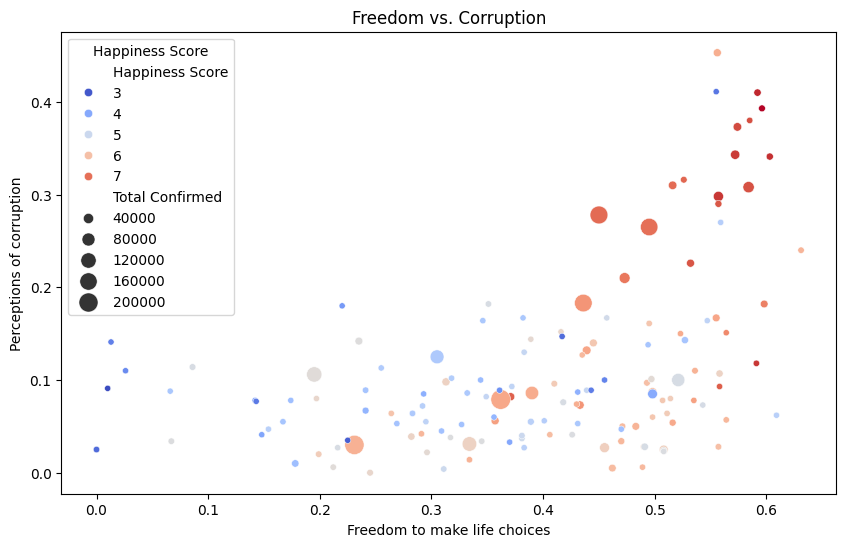

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Freedom', y='Corruption', hue='Happiness Score', size='Total Confirmed', sizes=(20, 200), palette='coolwarm')
plt.title('Freedom vs. Corruption')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Perceptions of corruption')
plt.legend(title='Happiness Score')
plt.show()